In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
(fashion_train, fashion_test), info = tfds.load('fashion_mnist', split=['train[:60]', 'train'],with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8QOTTJ/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8QOTTJ/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
fashion_train

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

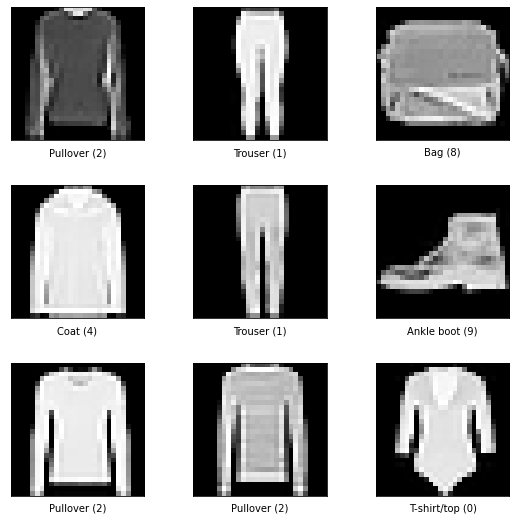

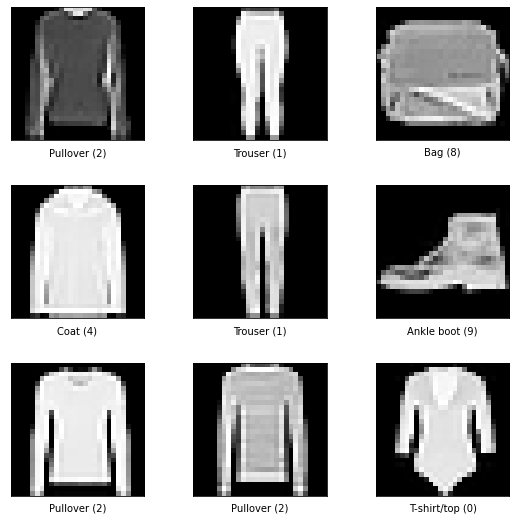

In [ ]:
tfds.show_examples(fashion_train, info)

In [ ]:
X_train = []
Y_train = []
   
for instance in fashion_train:
  X_train.append(instance['image'])
  Y_train.append(instance['label'])

In [ ]:
X_train = np.array(X_train)
X_train.shape

(60, 28, 28, 1)

In [ ]:
Y_train = np.array(Y_train)
Y_train.shape

(60,)

In [ ]:
Y_train

array([2, 1, 8, 4, 1, 9, 2, 2, 0, 2, 6, 9, 0, 7, 5, 4, 0, 1, 8, 0, 4, 2,
       6, 7, 0, 6, 4, 0, 3, 1, 2, 7, 1, 2, 5, 5, 8, 6, 6, 4, 5, 1, 2, 9,
       4, 9, 3, 1, 2, 9, 0, 8, 9, 1, 3, 3, 1, 3, 6, 7])

In [ ]:
# One Hot Encoding, 10 possibel values or classes
Y_train = tf.one_hot(Y_train, 10)

In [ ]:
Y_train

<tf.Tensor: shape=(60, 10), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0.,

In [ ]:
# Building the Neural Network, Convolution Neural Network!

# Importing libraries
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
cnn_model = keras.Sequential()

In [ ]:
cnn_model.add(Conv2D(20, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_model.add(Conv2D(15, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_model.add(Conv2D(10, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 20)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 15)        1215      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 15)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 10)        610       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 10)       0

In [ ]:
X_train = X_train/255

In [ ]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.4)

In [ ]:
cnn_model.compile(optimizer=SGD, loss='categorial_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_model.fit(X_train, Y_train, epochs=35, batch_size=150, shuffle=True)

Epoch 1/35
1/1 [==============================] - 2s 2s/step - loss: 2.3035 - accuracy: 0.1167
Epoch 2/35
1/1 [==============================] - 0s 191ms/step - loss: 2.2184 - accuracy: 0.3167
Epoch 3/35
1/1 [==============================] - 0s 182ms/step - loss: 2.1328 - accuracy: 0.3167
Epoch 4/35
1/1 [==============================] - 0s 160ms/step - loss: 2.0434 - accuracy: 0.3000
Epoch 5/35
1/1 [==============================] - 0s 167ms/step - loss: 1.9493 - accuracy: 0.3167
Epoch 6/35
1/1 [==============================] - 0s 96ms/step - loss: 1.8492 - accuracy: 0.3167
Epoch 7/35
1/1 [==============================] - 0s 92ms/step - loss: 1.7410 - accuracy: 0.3667
Epoch 8/35
1/1 [==============================] - 0s 94ms/step - loss: 1.6234 - accuracy: 0.5333
Epoch 9/35
1/1 [==============================] - 0s 94ms/step - loss: 1.4977 - accuracy: 0.5833
Epoch 10/35
1/1 [==============================] - 0s 100ms/step - loss: 1.3672 - accuracy: 0.6167
Epoch 11/35
1/1 [=========

In [ ]:
cnn_model.evaluate(X_train, Y_train)

2/2 [==============================] - 0s 21ms/step - loss: 0.0658 - accuracy: 1.0000


[0.06579912453889847, 1.0]

In [ ]:
predictions = cnn_model.predict(X_train)
predicted_classes = np.argmax(predictions, axis=1)

2/2 [==============================] - 0s 18ms/step


In [ ]:
predictions

array([[1.42760517e-03, 3.81910992e-09, 7.86436677e-01, 1.40670512e-04,
        6.46193884e-03, 1.41876126e-05, 2.05075517e-01, 1.70843464e-06,
        4.07553802e-04, 3.41386949e-05],
       [2.06437835e-06, 9.99750733e-01, 5.84289117e-10, 2.46565323e-04,
        1.01774404e-07, 9.02744102e-10, 1.95544874e-13, 3.78346438e-10,
        6.08842640e-07, 1.12563727e-08],
       [1.20474651e-04, 3.95834387e-09, 2.03076899e-02, 7.52018650e-06,
        1.57811795e-03, 3.52655803e-07, 9.67818648e-02, 8.51141913e-09,
        8.80837560e-01, 3.66408000e-04],
       [5.61110901e-05, 3.40041970e-12, 4.51142527e-02, 8.70700603e-07,
        9.39068556e-01, 3.82725839e-12, 1.54239824e-02, 2.76612101e-11,
        3.36041849e-04, 8.73967068e-08],
       [8.16105785e-06, 9.99485314e-01, 2.00117123e-09, 5.02846960e-04,
        1.38197478e-07, 9.22988335e-08, 3.13147468e-12, 4.36744330e-09,
        3.06956917e-06, 2.75852102e-07],
       [8.15724945e-08, 6.09963191e-09, 1.52533937e-06, 2.52788254e-06,
   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!pip install nbconvert
!jupyter nbconvert --to pdf Sample1.ipynb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] WARNING | pattern 'Sample1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any 

In [11]:
!pip install nbconvert


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
